In [21]:
# Cell 1: Import Necessary Libraries
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Define parameters
num_clusters = 30  # Set your desired number of clusters here


In [22]:
# Cell 3: Load Data

# loading the file directly from a path
import pandas as pd

file_path = 'Search_terms_report_mini.csv'

keywords_df = pd.read_csv(file_path, encoding="utf-16", delimiter="\t", quotechar='"', skiprows=2, low_memory=False)

keywords_df.head()


,Search term,Match type,Added/Excluded,Campaign,Ad group,Currency code,Avg. CPV,Avg. CPM,Impr.,Interactions,Interaction rate,Avg. cost,Cost,Campaign type,Views,Conv. rate,Conversions,Cost / conv.
0,bebiendo lagrimas,Broad match,NaN,Motiff | Salsa de Ahora | LatAm,Motiff | Salsa de Ahora | Discovery | KWs,USD,0.0,0.0,3,0,0.00%,0.0,0.0,Video,0,0.00%,0.0,0.0
1,carin león nueva cancion,Broad match,NaN,Motiff | Salsa de Ahora | LatAm,Motiff | Salsa de Ahora | Discovery | KWs,USD,0.0,0.0,1,0,0.00%,0.0,0.0,Video,0,0.00%,0.0,0.0
2,micaela salsa remix,Broad match,NaN,Motiff | Salsa de Ahora | LatAm,Motiff | Salsa de Ahora | Discovery | KWs,USD,0.0,0.0,1,0,0.00%,0.0,0.0,Video,0,0.00%,0.0,0.0
3,la ultima cancion salsa,Broad match,NaN,Motiff | Salsa de Ahora | LatAm,Motiff | Salsa de Ahora | Discovery | KWs,USD,0.0,0.0,1,0,0.00%,0.0,0.0,Video,0,0.00%,0.0,0.0
4,salsa de maelo ruiz,Broad match,NaN,Motiff | Salsa de Ahora | LatAm,Motiff | Salsa de Ahora | Discovery | KWs,USD,0.0,0.0,5,0,0.00%,0.0,0.0,Video,0,0.00%,0.0,0.0


In [23]:
# Cell 4: Preprocess the Data

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Download NLTK data
nltk.download('stopwords', download_dir=nltk.data.path[0])  # Stopwords

# Spanish stemmer
stemmer = SnowballStemmer('spanish')

def preprocess(text):
    # Tokenize by splitting the text on whitespace
    words = text.split()
    # Remove Spanish stopwords and stem the words
    words = [stemmer.stem(word) for word in words if word.lower() not in stopwords.words('spanish')]
    return ' '.join(words)

# Apply preprocessing to the 'Search term' column
keywords_df['processed_term'] = keywords_df['Search term'].apply(preprocess)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iroko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Cell 5: Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Download Spanish stopwords
nltk.download('stopwords', download_dir=nltk.data.path[0])

# Define Spanish stopwords
spanish_stopwords = stopwords.words('spanish')

# Initialize a TfidfVectorizer object with Spanish stopwords
vectorizer = TfidfVectorizer(stop_words=spanish_stopwords)

# Fit and transform the processed terms
X = vectorizer.fit_transform(keywords_df['processed_term'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iroko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# Cell 6: Clustering

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters).fit(X)  
keywords_df['topic'] = kmeans.labels_



c:\Users\iroko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
# Cell 7: Review and Label
# Display top keywords from each cluster
for i in range(num_clusters):  # Assuming you chose 5 clusters
    print(f"Cluster {i}:")
    print(keywords_df[keywords_df['topic'] == i]['Search term'].head(10))
    print("\n")


Cluster 0:
194                          musica 80 español
532     musica de los 80 y 90 en ingles exitos
724                        canciones de los 80
800                      música disco delos 80
992                           musíca de los 80
1153              musica de los 90 para bailar
1174                             los 90 cumbia
1314                 musica bailable de los 90
1316              musica de los 80 mas sonadas
1428                música disco 70 ́s y 80 ́s
Name: Search term, dtype: object


Cluster 1:
5                      cancion ratatouille
20                        canciones piolas
23                        cancion medellin
38                     canciones mexicanas
44     canciones para recordar tu infancia
47                          canciones funk
48           canciones de rolando la serie
61                  cancion ahora q te vas
64    guayaquil perla del pacifico cancion
69               canciones peso pluma 2023
Name: Search term, dtype: object


Cluster 

Number of keywords per cluster:
topic
0       305
1      5592
2      1503
3       152
4     20297
5      1076
6      1342
7       238
8       111
9      1037
10      482
11     1299
12      493
13      458
14      251
15     2515
16      270
17      632
18      190
19      215
20      601
21      380
22     8413
23      841
24      201
25      425
26      356
27      581
28      695
29      380
Name: count, dtype: int64


C:\Users\iroko\AppData\Local\Temp\ipykernel_36536\3472012439.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


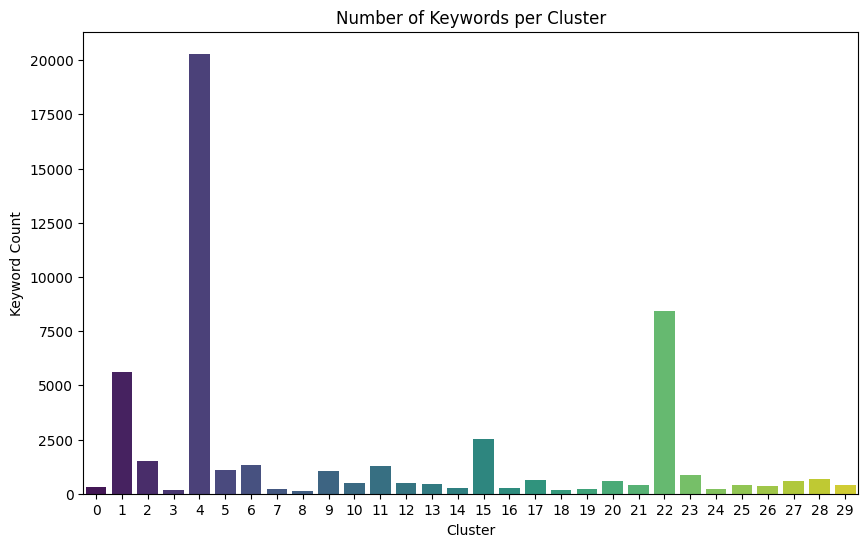

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of keywords per cluster
cluster_counts = keywords_df['topic'].value_counts().sort_index()

# Display the counts
print("Number of keywords per cluster:")
print(cluster_counts)

# Visualize the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title('Number of Keywords per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Keyword Count')
plt.show()
